In [13]:
# install libraries
!pip install requests
!pip install bs4
!pip install lxml

In [14]:
# import packages
# analyse the data
import pandas as pd

# get data from internet
import requests

# parsing data with BeautifulSoup
from bs4 import BeautifulSoup

In [15]:
# specify URL
url = "https://www.worldometers.info/coronavirus/"

In [16]:
covid = requests.get(url)

In [17]:
if covid.status_code == 200: 
    html_doc = covid.text


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
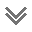

In [18]:
covid_data = BeautifulSoup(html_doc)
print(covid_data.prettify())

In [19]:
# extract tabular data
# variable_name = variable2.find(‘tag_name’, attrs={attribute_id})
covid_table = covid_data.find('table', attrs={'id' : 'main_table_countries_today'})
covid_table 

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [20]:
# Now we need to specify beautiful soup to go through the table and find everything 
# with a tr tag

rows = covid_table.find_all('tr', attrs={"style" : ""})
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>508,904,562</td>
 <td

In [21]:
# Convert the extracted data into a Pandas DataFrame.
output = []

# define column names (taken from table)
column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# create for loop statement to extract column data (td)
for cases in rows: 
    cases = cases.find_all("td")
    if cases:
        cases2 = [td.text for td in cases]
        output.append(dict(zip(column_names, cases2)))
        
output

[{'Country,Other': '',
  'Total Cases': 'World',
  'New Cases': '508,904,562',
  'Total Deaths': '+394,197',
  'New Deaths': '6,241,333',
  'Total Recovered': '+1,142',
  'New Recovered': '461,242,655',
  'Active Cases': '+351,596',
  'Serious, Critical': '41,420,574',
  'Tot Cases/ 1M pop': '42,725',
  'Deaths/ 1M pop': '65,288',
  'Total Tests': '800.7',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country,Other': '1',
  'Total Cases': 'USA',
  'New Cases': '82,628,089',
  'Total Deaths': '',
  'New Deaths': '1,018,154 ',
  'Total Recovered': '',
  'New Recovered': '80,402,401',
  'Active Cases': '',
  'Serious, Critical': '1,207,534',
  'Tot Cases/ 1M pop': '1,512',
  'Deaths/ 1M pop': '247,019',
  'Total Tests': '3,044',
  'Tests/ 1M pop': '1,000,126,235',
  'Population': '2,989,904'},
 {'Country,Other': '2',
  'Total Cases': 'India',
  'New Cases': '43,054,952',
  'Total Deaths': '',
  'New Deaths': '522,149 ',
  'Total Recovered': '',
  'New Recovered': '42,517,724',
  'Active 

In [22]:
# create DataFrame 
import pandas as pd 
data = pd.DataFrame(output)
data.head()

Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0                     World  508,904,562     +394,197   6,241,333   
1             1         USA   82,628,089               1,018,154    
2             2       India   43,054,952                 522,149    
3             3      Brazil   30,338,697                 662,618    
4             4      France   28,164,406                 144,945    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0          +1,142   461,242,655     +351,596        41,420,574   
1                    80,402,401                      1,207,534   
2                    42,517,724                         15,079   
3                    29,353,398                        322,681   
4                    25,750,641                      2,268,820   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            42,725         65,288       800.7                            
1             1,512        247,019       3,044  1,000,126,235  2,989,904  
2               698         30,656         372    834,281,170    594,024  
3             8,318        140,925       3,078     63,776,166    296,244  
4             1,677        429,769       2,212    266,484,045  4,066,358

## 6. Convert, clean and analyse the data

In [24]:
# save above dataframe 
data.to_csv('cases.cvs', index=False)

In [30]:
# Create and view a JSON output
import json

out_json = json.dumps(output)

out_json

'[{"Country,Other": "", "Total Cases": "World", "New Cases": "508,904,562", "Total Deaths": "+394,197", "New Deaths": "6,241,333", "Total Recovered": "+1,142", "New Recovered": "461,242,655", "Active Cases": "+351,596", "Serious, Critical": "41,420,574", "Tot Cases/ 1M pop": "42,725", "Deaths/ 1M pop": "65,288", "Total Tests": "800.7", "Tests/ 1M pop": "", "Population": ""}, {"Country,Other": "1", "Total Cases": "USA", "New Cases": "82,628,089", "Total Deaths": "", "New Deaths": "1,018,154 ", "Total Recovered": "", "New Recovered": "80,402,401", "Active Cases": "", "Serious, Critical": "1,207,534", "Tot Cases/ 1M pop": "1,512", "Deaths/ 1M pop": "247,019", "Total Tests": "3,044", "Tests/ 1M pop": "1,000,126,235", "Population": "2,989,904"}, {"Country,Other": "2", "Total Cases": "India", "New Cases": "43,054,952", "Total Deaths": "", "New Deaths": "522,149 ", "Total Recovered": "", "New Recovered": "42,517,724", "Active Cases": "", "Serious, Critical": "15,079", "Tot Cases/ 1M pop": "69

In [31]:
# Save the JSON output as a JSON 
with open('case_json.json', 'w') as f:
    json.dump(output, f)

In [35]:
# read json using pandas, output to .csv
pd.read_json(out_json).to_csv('cases_csv.csv', index=False)

In [37]:
# Import the CSV and JSON files and view them with the head() method.
variable_csv = pd.read_csv('cases_csv.csv')

print(variable_csv.head())

variable_json = pd.read_json('case_json.json')

print(variable_json.head())

   Country,Other Total Cases    New Cases Total Deaths  New Deaths  \
0            NaN       World  508,904,562     +394,197   6,241,333   
1            1.0         USA   82,628,089          NaN  1,018,154    
2            2.0       India   43,054,952          NaN    522,149    
3            3.0      Brazil   30,338,697          NaN    662,618    
4            4.0      France   28,164,406          NaN    144,945    

  Total Recovered New Recovered Active Cases Serious, Critical  \
0          +1,142   461,242,655     +351,596        41,420,574   
1             NaN    80,402,401          NaN         1,207,534   
2             NaN    42,517,724          NaN            15,079   
3             NaN    29,353,398          NaN           322,681   
4             NaN    25,750,641          NaN         2,268,820   

  Tot Cases/ 1M pop Deaths/ 1M pop Total Tests  Tests/ 1M pop Population  
0            42,725         65,288       800.7            NaN        NaN  
1             1,512        247,0

In [43]:
# View the data types and column names of both DataFrames.
print(variable_csv.dtypes)
print(variable_csv.columns)

Country,Other        float64
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths            object
Total Recovered       object
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/ 1M pop     object
Deaths/ 1M pop        object
Total Tests           object
Tests/ 1M pop         object
Population            object
dtype: object
Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ 1M pop', 'Population'],
      dtype='object')


In [46]:
print(variable_json.dtypes)
print(variable_json.columns)

Country,Other        object
Total Cases          object
New Cases            object
Total Deaths         object
New Deaths           object
Total Recovered      object
New Recovered        object
Active Cases         object
Serious, Critical    object
Tot Cases/ 1M pop    object
Deaths/ 1M pop       object
Total Tests          object
Tests/ 1M pop        object
Population           object
dtype: object
Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ 1M pop', 'Population'],
      dtype='object')


In [54]:
variable_csv_ss = variable_csv[['Country,Other', 'Total Cases', 'Total Deaths',
                        'Total Recovered', 'Active Cases', 'Serious, Critical']]

variable_csv_ss.head()

Country,Other Total Cases Total Deaths Total Recovered Active Cases  \
0            NaN       World     +394,197          +1,142     +351,596   
1            1.0         USA          NaN             NaN          NaN   
2            2.0       India          NaN             NaN          NaN   
3            3.0      Brazil          NaN             NaN          NaN   
4            4.0      France          NaN             NaN          NaN   

  Serious, Critical  
0        41,420,574  
1         1,207,534  
2            15,079  
3           322,681  
4         2,268,820

In [57]:
# Determine the number of missing values in the new DataFrame.

variable_csv_ss.isna().sum()

Country,Other          2
Total Cases            0
Total Deaths         166
Total Recovered      185
Active Cases         170
Serious, Critical     15
dtype: int64

In [60]:
# Save the new DataFrame as a CSV file.
variable_csv_ss.to_csv('cases_repot.csv', index=False)

In [62]:
# view saved CSV
cases_report = pd.read_csv('cases_repot.csv')

cases_report.head()

Country,Other Total Cases Total Deaths Total Recovered Active Cases  \
0            NaN       World     +394,197          +1,142     +351,596   
1            1.0         USA          NaN             NaN          NaN   
2            2.0       India          NaN             NaN          NaN   
3            3.0      Brazil          NaN             NaN          NaN   
4            4.0      France          NaN             NaN          NaN   

  Serious, Critical  
0        41,420,574  
1         1,207,534  
2            15,079  
3           322,681  
4         2,268,820